In [15]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
# Step 2: Simulate Dataset
np.random.seed(42)
n_samples = 300

df = pd.DataFrame({
    'GR': np.random.uniform(20, 120, n_samples),
    'RHOB': np.random.uniform(2.0, 2.7, n_samples),
    'NPHI': np.random.uniform(0.1, 0.5, n_samples),
    'DT': np.random.uniform(40, 120, n_samples),
    'ILD': np.random.uniform(1, 200, n_samples),
    'PE': np.random.uniform(0.5, 5, n_samples),
    'DEPTH': np.linspace(1000, 2000, n_samples)
})

conditions = [
    (df['GR'] < 50) & (df['RHOB'] > 2.5),
    (df['NPHI'] > 0.3) & (df['GR'] >= 50),
    (df['PE'] < 1.5),
]
choices = ['Sandstone', 'Shale', 'Limestone']
df['LITHOLOGY'] = np.select(conditions, choices, default='Dolomite')
df['LITHOLOGY_CODE'] = pd.factorize(df['LITHOLOGY'])[0]

In [17]:
# Step 3: EDA (Exploratory Data Analysis)
print("🔍 Dataset Info:")
print(df.info())
print("\n📊 Summary Statistics:")
print(df.describe())
print("\n🎯 Lithology Class Distribution:")
print(df['LITHOLOGY'].value_counts())

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GR              300 non-null    float64
 1   RHOB            300 non-null    float64
 2   NPHI            300 non-null    float64
 3   DT              300 non-null    float64
 4   ILD             300 non-null    float64
 5   PE              300 non-null    float64
 6   DEPTH           300 non-null    float64
 7   LITHOLOGY       300 non-null    object 
 8   LITHOLOGY_CODE  300 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB
None

📊 Summary Statistics:
               GR        RHOB        NPHI          DT         ILD          PE  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean    69.520460    2.357582    0.288436   81.559831  100.532326    2.697937   
std     29.434054    0.211813    0.113371   23.7440

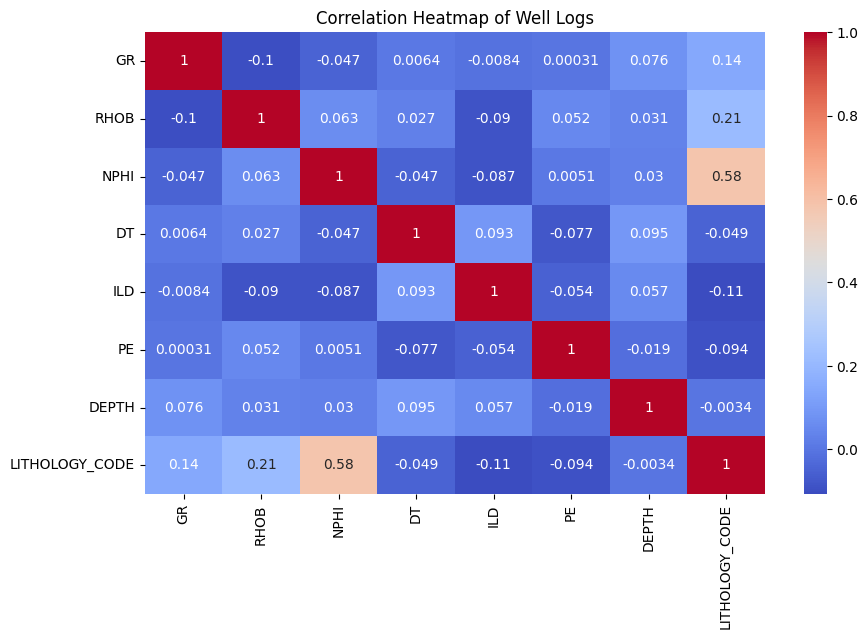

In [18]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Well Logs")
plt.savefig("Correlation_Heatmap_of_Well_Logs.png")
plt.show()

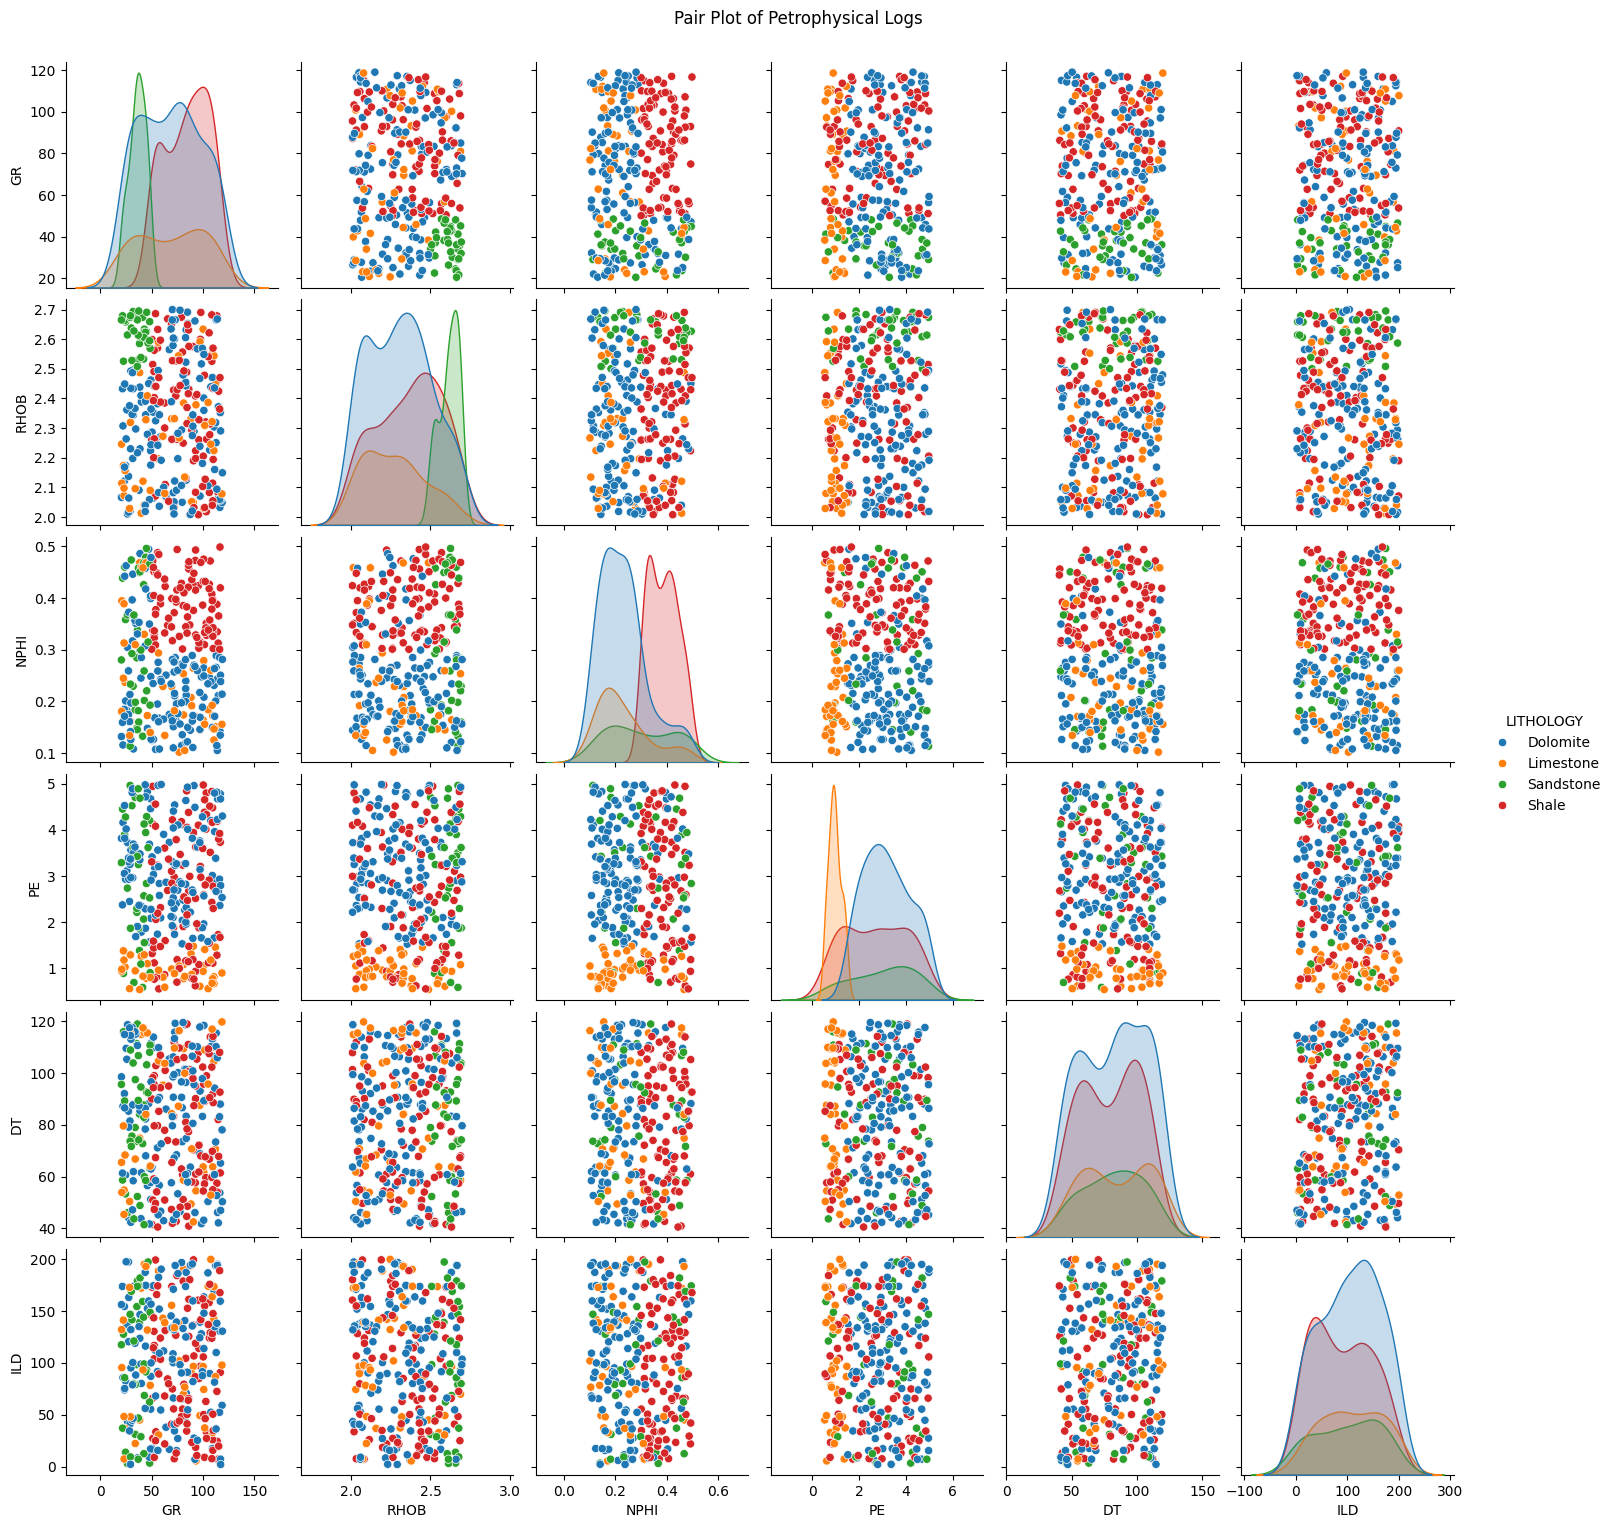

In [19]:
# Pair Plot
sns.pairplot(df[['GR', 'RHOB', 'NPHI', 'PE', 'DT', 'ILD', 'LITHOLOGY']], hue='LITHOLOGY')
plt.suptitle("Pair Plot of Petrophysical Logs", y=1.02)
plt.savefig("Pair_Plot_of_Petrophysical_Logs.png")
plt.show()

In [20]:
# Step 4: Train-Test Split
features = ['GR', 'RHOB', 'NPHI', 'DT', 'ILD', 'PE']
X = df[features]
y = df['LITHOLOGY_CODE']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 5: Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Step 6: Evaluate Before Visualization
y_pred = model.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy BEFORE Visualization: {accuracy_before * 100:.2f}%")


✅ Model Accuracy BEFORE Visualization: 100.00%


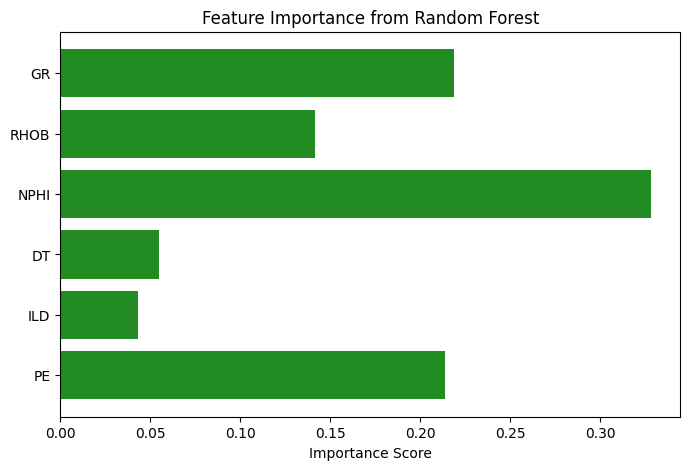

In [22]:
# Step 7: Visualizations

# Feature Importance
importances = model.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='forestgreen')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.savefig("Feature_Importance_from_Random_Forest.png")
plt.show()

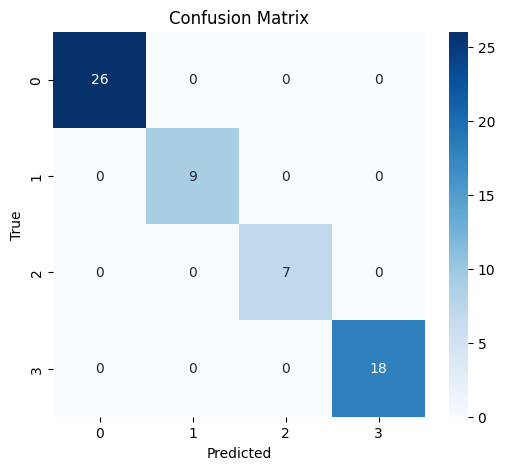

In [23]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("Confusion_Matrix.png")
plt.show()

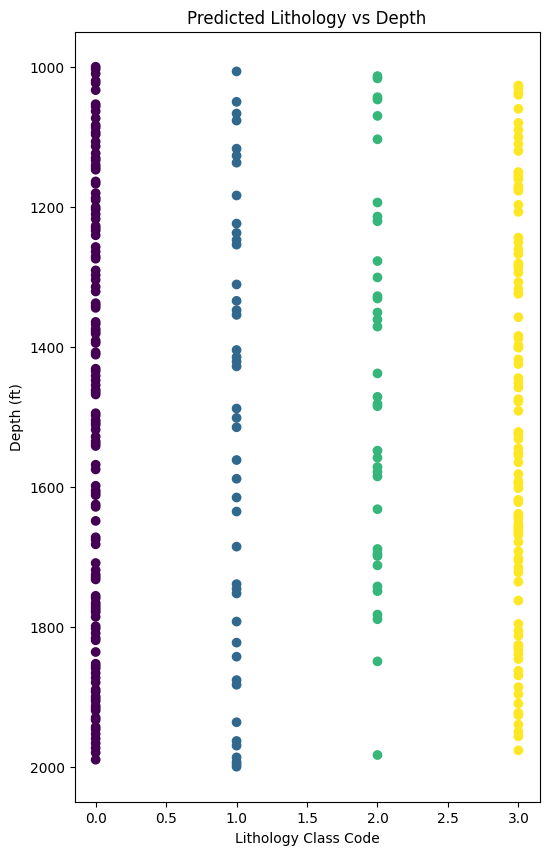

In [24]:
# Predicted Lithology vs Depth
df['PREDICTED_LITHOLOGY'] = model.predict(X)
depth_sorted = df.sort_values('DEPTH')
plt.figure(figsize=(6, 10))
plt.scatter(depth_sorted['PREDICTED_LITHOLOGY'], depth_sorted['DEPTH'], 
            c=depth_sorted['PREDICTED_LITHOLOGY'], cmap='viridis')
plt.gca().invert_yaxis()
plt.title("Predicted Lithology vs Depth")
plt.xlabel("Lithology Class Code")
plt.ylabel("Depth (ft)")
plt.savefig("Predicted_Lithology_vs_Depth.png")
plt.show()